# Assignment 1

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [0]:
NAME = "Vidya Jayaraman"
STUDENT_ID = "1620208"

## Problem 1 -  Bayes' Theorem

Suppose there exists a test to classify emails as spam or not spam based on the contained words. This test accurately identifies spam (if it is actually spam) 95% of the time. The prevalence of spam emails is 3 in 10. Also, if an email isn't spam, the test will incorrectly classify it as spam 5% of the time.

NOTE: For each of the following questions, please give each answer to at least 2 significant digit accuracy. To accomplish this, don't round off your results until the very last step of each calculation.

### a. What's the probability that an email picked at random is spam? What's the probability that an email picked at random isn't spam?


The probability that an email picked at random is spam is .30, which is given in the problem. The probability that an email picked at random is not spam is, 1- spam = 1 - 0.30 = 0.70. So, the probability that it is not spam is 0.70. 

### b. If you test an email and it reports positive for spam, what is the probability that it is spam?


The formula is P(spam | positive) = $\frac{P(positive | spam) * P(spam)}{P(positive_-test)}$. 

In order to get the value of P(positive test | spam), we know that the value is 0.95. The probability that it is spam is 0.3. So, $\frac{0.95 * 0.3} {P(positive_-test)}$. 

Now, we need to calculate P(positive test). So, the formula for this is: P(positive test) = P(positive, spam) + P(positive, not spam) = True Positive Rate + False Positive Rate = $(0.95 * 0.30) + (.70 * 0.05)$ = 0.32. 

So, putting the values in to the equation, we get: (spam | positive) = $\frac{0.95 * 0.3} {0.32}$ = 0.89

So, the probability that it is spam is 0.89. 

### c. If you test an email and it reports negative for spam, what is the probability that it is spam?

The formula is P(spam | negative test) = $\frac{P(negative | spam) * P(spam)}{P(negative_-test)}$. 

In order to get the value of P(negative test | spam), we know that the value is 0.05. The probability that it is spam is 0.3. So, $\frac{0.05 * 0.3} {P(positive_-test)}$. 

Now, we need to calculate P(positive test). So, the formula for this is: P(negative test) = P(negative, spam) + P(negative, not spam) = False Negative Rate + True Negative Rate = $(0.05 * 0.30) + (.95 * 0.7)$ = 0.68. 

So, putting the values in to the equation, we get: (spam | positive) = $\frac{0.05 * 0.3} {0.68}$ = 0.89

The probability that it is spam is 0.02. 

## Monte Carlo Simulations

Monte Carlo simulations can yield numeric solutions to probability problems that aren't possible to solve analytically. These simulations are also often easy to code up, and so also provide a way to check one's calculations for problems that amenable to analysis. So this is an important technique to become familiar with.

Basically, one creates a simulation of the situation, and runs many trials that allow one to estimate the probabilities by computing proportions. 

First we give you an example of a Monte Carlo simulation, and then you'll solve such a problem yourself.

### Example

If you toss a coin 10 times, with what probability are you likely to see the subsequence {H, H, T, T} appear?

Be patient, this may take a bit to run, but notice how straightforward the coding is. The simplicity of the Monte Carlo method makes it very powerful.

In [0]:
from numpy.random import randint
import numpy as np

num_tosses = 10    # tosses per trial
num_trials = 100000

# This sets the feedback interval so we know the program hasn't crashed.
feedback = int(np.round(num_trials / 10))

num_seq_found = 0   # to count the number of target subsequences detected
for t in range(1, num_trials + 1):
    
    # To see the progress.
    if t % feedback == 0:  
        print(np.round(100 * t / num_trials, 1), '%  complete:   prob =', num_seq_found / t)
        
    # Roll the die num_tosses times.
    # randint rolled 1 or 2- heads or tails
    trial = [randint(1, 3) for _ in range(num_tosses)]
    # Find the indices of all the 2s.
    # gets the position of heads by including i in heads, if trial[i] == 1
    heads = [i for i in range(num_tosses) if trial[i] == 1]

    # Search to see if after each 2 we have a 4 followed by a 6.
    for j in heads:
        if j < num_tosses - 3 and trial[j] == 1 and trial[j + 1] == 1 and trial[j + 2] == 2 and trial[j + 3] == 2:
            # We've found the target subsequence.
            num_seq_found += 1
    
print('Probability of this subsequence =', num_seq_found / num_trials)

10.0 %  complete:   prob = 0.4422
20.0 %  complete:   prob = 0.441
30.0 %  complete:   prob = 0.438
40.0 %  complete:   prob = 0.4398
50.0 %  complete:   prob = 0.43822
60.0 %  complete:   prob = 0.43753333333333333
70.0 %  complete:   prob = 0.43688571428571427
80.0 %  complete:   prob = 0.437325
90.0 %  complete:   prob = 0.4375222222222222
100.0 %  complete:   prob = 0.43642
Probability of this subsequence = 0.43642


## Problem 2  -  Monte Carlo Simulation

Consider two dice: One fair and one unfair. The unfair die has a 50% chance to land on the 6 face, and even chance for the rest of the faces.

Write code that rolls both dice and computes the sum.

Do this many times, and give the mean of all the sums.  This will converge to the expected average sum of both randomly rolled dice. You may need to run this several times to be sure of your accuracy. You can check the correctness of your Monte Carlo Simulation by solving this problem analytically.

Hint:

https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html

In [1]:
import numpy as np
from numpy.random import choice

# number of trials
num_trials = 100000

# the different dice choices
dice_choice = [1, 2, 3, 4, 5 , 6]
# probability of the unfair dice
probabilities_unfair = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]
# declaring variables
mean_sum = 0
total = 0
count = 1
# iterating for the total amount of the trials
for i in range(1, num_trials + 1):
  # result of rolling the unfair die
  unfair = choice(dice_choice, p=probabilities_unfair)
  # result of rolling the fair die
  fair = choice(dice_choice)
  # get the sum of both  dice
  total += (fair + unfair)

# average of the sume of the dice rolls 
mean_sum = total/num_trials
print('mean sum =', mean_sum)




mean sum = 7.99337




mean sum = 7.99


## Problem 3 - Data Processing



There are three types of data:

1.   **Numerical**: For example height, price of a good, heart rate and so on. These data are quantitative in nature.
2.   **Categorical**: While these are qualitative in nature. For example "Yes" or "No", "Red","Green" or "Blue" and "Doggo" or "Kitty".
3.   **Ordinal**: This is a combination of the above, for example movie ratings of 1-5.
 


Machine learning algorithms need data to work. Before you start applying machine learning, you must process your data into a form a machine learning model will expect. This is known as **data preprocessing**.  

The data we are working with pertains to the airline domain in India. It was used in a hackathon, where the goal was to predict airline prices given a set of *features*. First let's download a dataset, go to link http://download853.mediafire.com/orceo1u9llng/l7j86drkdln9aye/Data_Train.xlsx and download the Data_Train.xlsx. Then upload the file to your notebook (without renaming) by clicking on the File icon on the left side and then clicking "Upload" and upload the "Data_Train.xlsx" file.

Now that we have some data, we need the appropriate libraries to first read the data in and if need be manipulate the data for use in machine learning.

In [0]:
# We import pandas, a Python library that allows us to read in common data formats such as .csv, .xlsx, etc... 
# as a dataframe, essentially a matrix of features.
import pandas as pd
data = pd.read_excel('Data_Train.xlsx')  # Read in the data we downloaded
data.dropna(inplace=True)

In [3]:
# We can examine the data by looking at the first 5 entries using the head() function.
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Exploratory Data Analysis

Before we start processing we should examine our data. This is known as exploratory data analysis.

Use seaborn to carry out data exploratory analysis to observe the distribution of Airlines.

[HINT: Use sns.countplot()]

Comment on the distribution of Airlines and what this could mean for price prediction?



```
# This is formatted as code
```

By looking at the countplot for the airlines, we would expect the total price for each airline to correlate to the amount of flights the airline takes. This does not mean that the price per flight correlates with the amount of flights the airline takes, but rather the price from all the flights taken, increases based on the total amount of flights taken. In this countplot, Jet Airways (not Jet Airways Business) has the most amount of journeys. By looking at the countplot and the barplot, one interesting observation is that while there are a lot less Jet Airways Business airlines than the other airlines, the average price per flight is a lot more (more than 3 times!) than any other airline. While the average price for all the other airlines is less than 2,000, the average price for Jet Airways Business airlines is almost 6,000.  Meanwhile, Jet Airways price is among the highest of the prices compared to the other airlines, but not nearly as much as Jet Airways Business. However, since Jet Airways Business did not take as many flights as the other airlines, its overall price (when computing all the journeys times its price), may be less than the airlines that have taken a lot more flights.  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


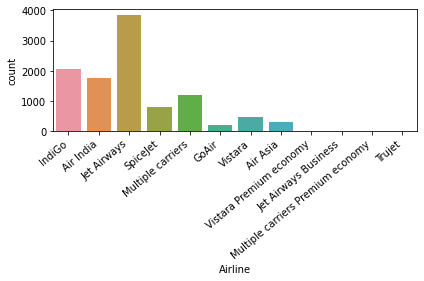

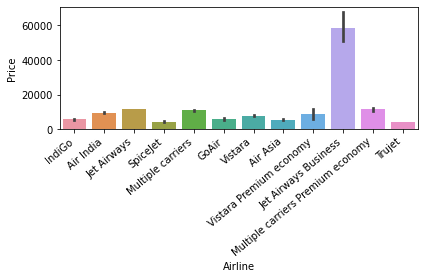

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns # Used for plotting
import matplotlib.pyplot as plt
# plotting the distribution of the different airlines in the "Airlines" column,
# or the count of each
ax = sns.countplot(x="Airline", data=data)
#rotated x-axis labels to prevent overlapping 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
# create a bar plot to compare the price of the different airlines
axs = sns.barplot(x="Airline", y="Price", data=data)
axs.set_xticklabels(axs.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
#uncomment this after you use seaborn
#plt.xticks(rotation=90)

### Data Preprocessing and Feature Engineering

We observe that this dataset has a mixture of data types ranging from: strings, date-time strings, and integers. 

Now we are ready to do some data preprocessing! Let's pretend we want to predict "Price", then it is reasonable to assume  "Airline", "Date_of_Journey", "Source", "Destination" , and "Route" could be useful features. We ignore "Dep_Time", "Arrival_Time" and "Duration". Similarly "Total_Stops" can be inferred from "Route" and "Additional_Info" could be useful in the future but for now we ignore it.

The goal of preprocessing is to handle any irregularities in the dataset such as missing values, awkwardly formatted entries and any other outlier cases (also known as data cleaning).
An example of a case we would need to deal with is in "Arrival_Time" row 1, the time and date is specified while other rows only have the time. A decision would have to be made whether or not to keep the date or just use the time. 

After our data is cleaned, we can confidently transform our data into the form machine learning models expect. Machine learning models are mathematical models and they work with vectors and matricies. Therefore after we finishing preprocessing we should have a dataframe of numbers i.e a matrix.

#### a) Processing: "Airline", "Source" and "Destination"

The data in these columns are strings and therefore not numerical. They must be transformed. There are several ways to do this transformation, but you can try the most simple method for this assignment. 

Given these columns transform the entries from strings to numerical data by:

i) First for **each** column define a **vocabulary**, that is a collection of all the unique words. 

ii) Second, with the knowledge of each unique word create mapping of each word to a unique integer.

iii) Third, with your mapping apply it to each column to complete the transformation to a numerical representation.

In [5]:
import pandas as pd
# define a vocabulary for each column 
# data = pd.read_excel('Data_Train.xlsx')  # Read in the data we downloaded
# Step 1: Create a vocabulary for each column
airline = data['Airline'].unique().tolist()
source = data['Source'].unique().tolist()
destination = data['Destination'].unique().tolist()


# Step 2: Create a mapping function from each word in the vocabulary to a unique integer
mappingAirline = dict( zip(airline,range(len(airline))))
mappingSource = dict( zip(source,range(len(source))))
mappingDest = dict( zip(destination,range(len(destination))))


# Step 3: Replce all words in the original data with the assigned integers
data.replace({'Airline': mappingAirline},inplace=True)
data.replace({'Source': mappingSource},inplace=True)
data.replace({'Destination': mappingDest},inplace=True)

data.head()




,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,24/03/2019,0,0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,1,1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,9/06/2019,2,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,0,12/05/2019,1,1,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,0,01/03/2019,0,0,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### b) Processing: "Date_of_Journey"

i) The entries in this column cannot be understood by any machine learning model as is. We must transform them to numerical representation.

Using pandas separate the dates into separate "Months" and "Weekdays". 

See example of creating a new column below.

HINT: dt.day_name() gets the weekday from a datatime format
and dt.month_name() gets the month name.

In [0]:
import datetime as dt # Used to deal with dates

In [20]:
# Overwrite column to be in datatime format
# That is: YYYY/MM/DD -> YYYY-MM-DD
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Date_of_Journey']

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

In [22]:
# getting the day of week of the journey 
data['day_of_week'] = data['Date_of_Journey'].dt.day_name()
data['day_of_week']

0           Sunday
1         Saturday
2           Friday
3         Thursday
4         Thursday
           ...    
10678    Wednesday
10679     Saturday
10680     Saturday
10681     Thursday
10682     Thursday
Name: day_of_week, Length: 10682, dtype: object

In [23]:
data['Journey_Month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
data['Journey_Month']

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Journey_Month, Length: 10682, dtype: int64

ii) Now that you have these new columns, are these features ready for a machine learning model? Please explain.


*italicized text*[YOUR ANSWER HERE]

#### c) Processing: Route

Processing "Route" is tricky as they are all different lengthed strings. Why is this a problem? It doesn't have to be if we feed our algorithm an entry one by one but that can be slow. We want to utilize the fact computers are designed to do matrix operations quickly.

To preprocess the "Route" column do the following:

i) Separate the strings by the empty string using split().

ii) Determine a vocabulary made up of each unique airport code and you may include the arrow that separates the codes.

iii) Using this vocabulary information devise a way to make sure all the strings/features are the same size and **NO NEED TO IMPLEMENT** it. Discuss why you choose that method and any limitations you can think of. [HINT: Think about the vocabulary approach from above and an approach called one hot encoding.]


In [30]:
# Step 1: seperate the strings by the empty string using split() 
code = data['Route'].str.split()

# flatten the list from a list of lists, since we are only interested in
# getting the airport codes, not the routes
flat_list = []
for sublist in code:
    for item in sublist:
      flat_list.append(item)
      # remove arrow, since it is not part of the vocabulary
      if(item == '→'): 
        flat_list.remove('→')
        

# Step 2: vocabulary called unique has each of the unique airport codes in order 
# by traversing through the list
unique = []
for x in flat_list:
    if x not in unique:
      unique.append(x)
print(unique)








['BLR', 'DEL', 'CCU', 'IXR', 'BBI', 'LKO', 'BOM', 'COK', 'NAG', 'MAA', 'AMD', 'PNQ', 'IDR', 'GAU', 'HYD', 'BHO', 'JAI', 'ATQ', 'JDH', 'GOI', 'BDQ', 'TRV', 'IXU', 'IXB', 'UDR', 'RPR', 'DED', 'VGA', 'VNS', 'ISK', 'IXC', 'PAT', 'JLR', 'KNU', 'GWL', 'VTZ', 'NDC', 'HBX', 'IXZ', 'IMF', 'IXA', 'STV']


First, we will assign an integer value to each of the airport codes, so 'BLR': 1, 'DEL': 2, 'CCU': 3, etc. We will use a mapping function to do this.  We can replace the unique integers with an array of 1's and 0's using one hot encoding, to represent which airport codes are present in the route. There will be a column for each of these airport routes. If an airport code is present in the route, it will be a 1, otherwise it will be a 0. This will ensure that the airport routes are all represented by the same length. However, since the airport codes are referred to by the column value, the column values cannot preserve the order of the airport route. We will know the airport codes on a particular route, but the drawback is, that we won't know the order of these airport codes.


#### d) Feature Engineering
Surprise surprise! We have been doing feature engineering all along by preprocessing the data and trasnforming or engineering it into a form a machine learning algorithm will expect.

But this doesn't mean the features cannot be improved!

Consider the "Airline" column from part a) each airline is mapped to a unique integer. Imagine a scenario where we have hundreds of unique airlines, the airline mapped to 100 for example would be weighted more than the airline mapped to 1. Similarly for columns "Source" and "Destination". To fix this discrepancy, we utilize standardization or normalization.

Use standarization to map all the values in these columns to the range [0,1] by using the following expression: 

```scaled_value = (value - min) / (max - min)```.

In [27]:
# scaled value for Airline
data['Airline'] = ((data['Airline']-data['Airline'].min())/(data['Airline'].max()-data['Airline'].min()))
# scaled value for Source
data['Source'] = ((data['Source']-data['Source'].min())/(data['Source'].max()-data['Source'].min()))
# scaled value for Destination
data['Destination'] = ((data['Destination']-data['Destination'].min())/(data['Destination'].max()-data['Destination'].min()))
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,day_of_week
0,0.000000,2019-03-24,0.00,0.0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,Sunday
1,0.090909,2019-01-05,0.25,0.2,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,Saturday
2,0.181818,2019-09-06,0.50,0.4,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,Friday
3,0.000000,2019-12-05,0.25,0.2,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,Thursday
4,0.000000,2019-01-03,0.00,0.0,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,Thursday
